<a href="https://colab.research.google.com/github/SoniyaGulia/colab/blob/main/task_1_for_owl_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Students Data Analysis**



Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

 Exploratory Data Analysis

In [ ]:
def check_df(dataframe, head=5):
    print("Shape:",dataframe.shape)
    print("\n")
    print("Data Types\n",dataframe.dtypes)
    print("\n")
    print("Head\n",dataframe.head(head))
    print("\n")
    print("Tail\n",dataframe.tail(head))
    print("\n")
    print("Null Check\n",dataframe.isnull().sum())
    print("\n")
    print("Duplicate Check:",dataframe.duplicated().sum())
    print("\nDistribution Information of Numerical Variables\n",dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
df = pd.read_csv("/content/Students data.csv")

In [ ]:
check_df(df)

Shape: (105, 17)


Data Types
 ID                       int64
class                   object
gender                  object
race                     int64
GPA                    float64
Algebra                  int64
Calculus1                int64
Calculus2                int64
Statistics               int64
Probability              int64
Measure                  int64
Functional_analysis      int64
from1                   object
from2                   object
from3                   object
from4                    int64
y                        int64
dtype: object


Head
      ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  Statistics  \
0  1141     A    male     1  73.47       64         81         87          60   
1  1142     A  female     1  71.22       57         50         51          51   
2  1143     A  female     2  74.56       47         48         71          60   
3  1144     A  female     1  72.89       46         72         38          60   
4  1145     A  

In [ ]:
df['y'].value_counts(normalize=True) * 100

,proportion
y,
0,52.380952
1,23.809524
2,23.809524


Capture Categorical Variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20,ignore_cols=None):
    """
   cat_th: numeric column threshold that behaves like a categorical column
   car_th: categorical column threshold with too many classes (cardinal)
    """
    if ignore_cols:
        dataframe = dataframe.drop(columns=ignore_cols)

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtype == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical Columns: {len(cat_cols)}')
    print(f'Numerical Columns: {len(num_cols)}')
    print(f'Categorical but Cardinal: {len(cat_but_car)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, ignore_cols=["ID"])

Observations: 105
Variables: 16
Categorical Columns: 7
Numerical Columns: 8
Categorical but Cardinal: 1


Categorical Variable Analysis

************************************************************
class Variable:
class
A    76
B    29
Name: count, dtype: int64
************************************************************


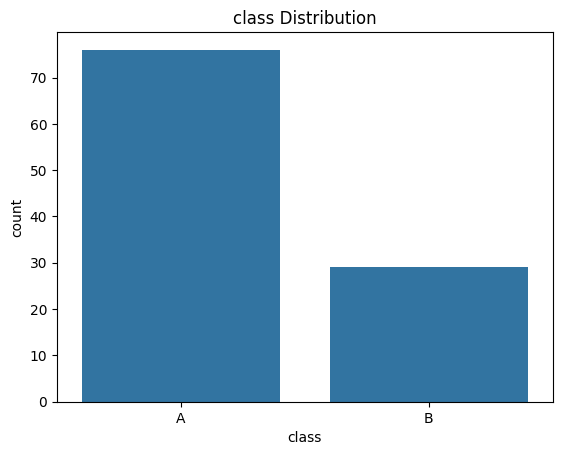





************************************************************
gender Variable:
gender
female    68
male      37
Name: count, dtype: int64
************************************************************


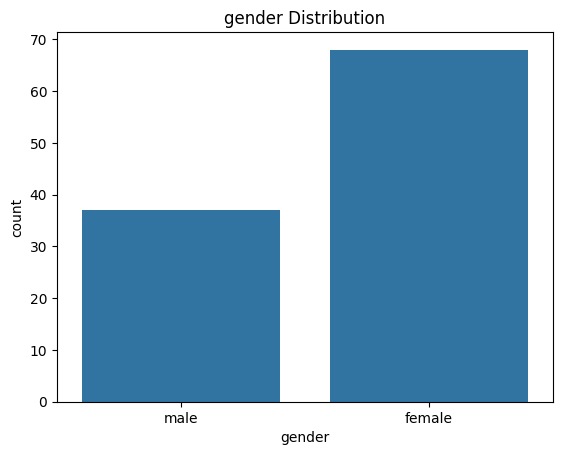





************************************************************
from2 Variable:
from2
B    73
A    32
Name: count, dtype: int64
************************************************************


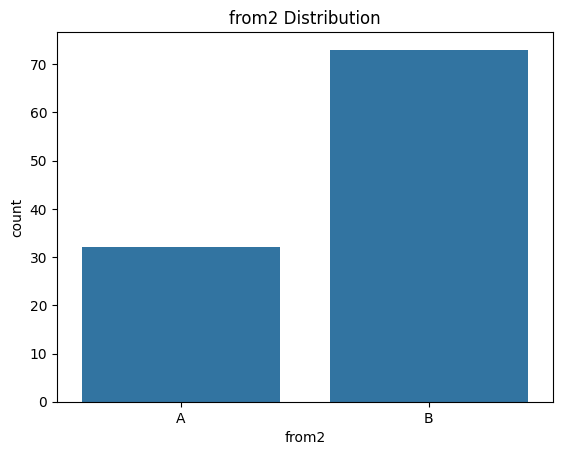





************************************************************
from3 Variable:
from3
A    81
D    10
S     6
C     4
B     4
Name: count, dtype: int64
************************************************************


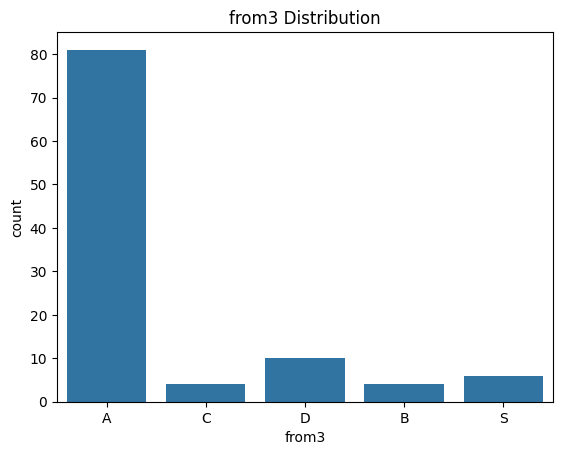





************************************************************
race Variable:
race
1    81
3     6
7     5
5     4
4     4
2     3
6     2
Name: count, dtype: int64
************************************************************


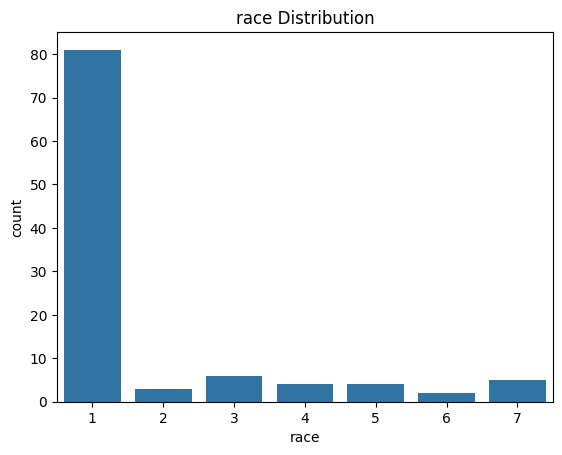





************************************************************
from4 Variable:
from4
0    79
2    25
3     1
Name: count, dtype: int64
************************************************************


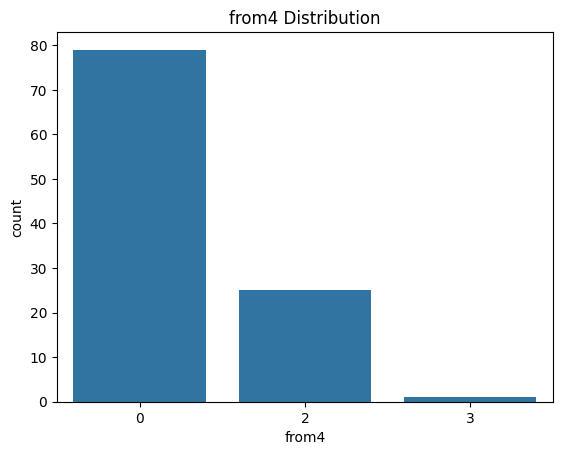





************************************************************
y Variable:
y
0    55
1    25
2    25
Name: count, dtype: int64
************************************************************


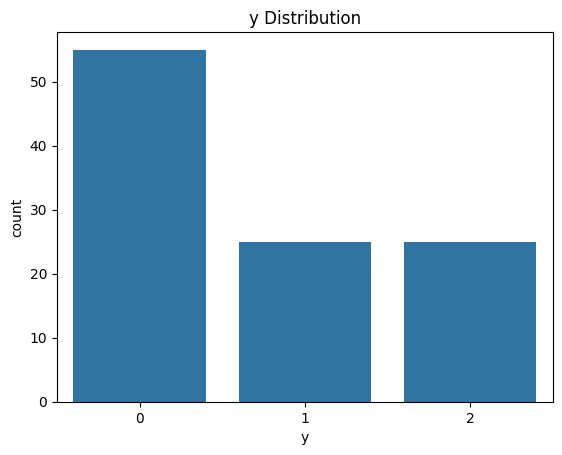

In [ ]:
for col in cat_cols:
    print("*" * 60)
    print(f"{col} Variable:")
    print(df[col].value_counts())
    print("*" * 60)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.show()
    print("\n\n\n")

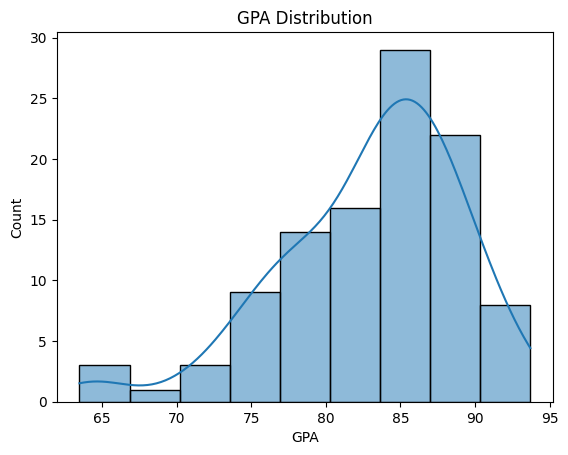

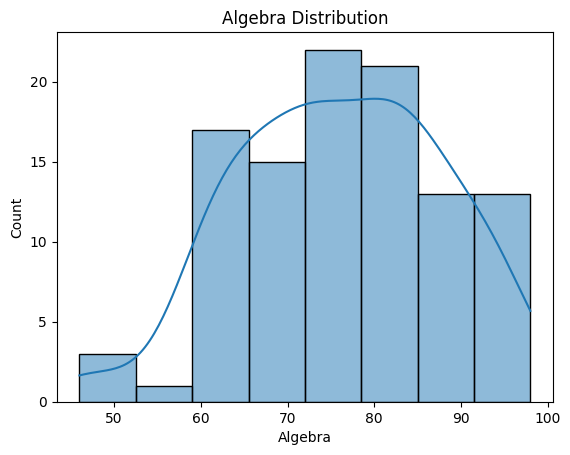

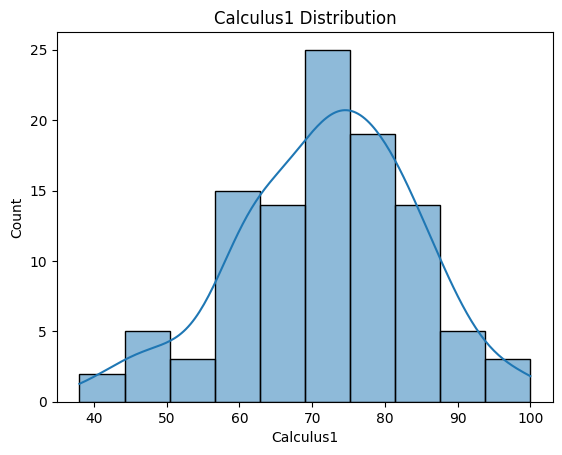

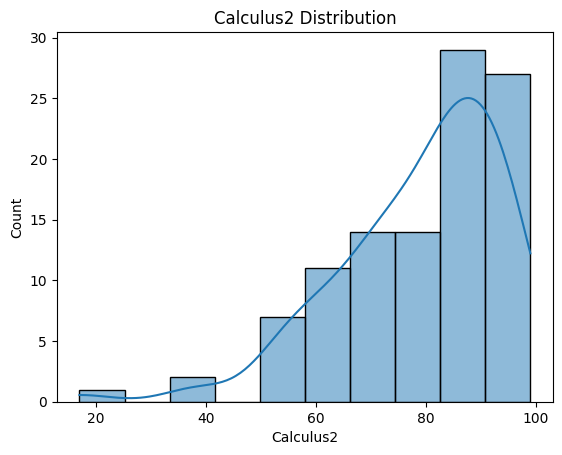

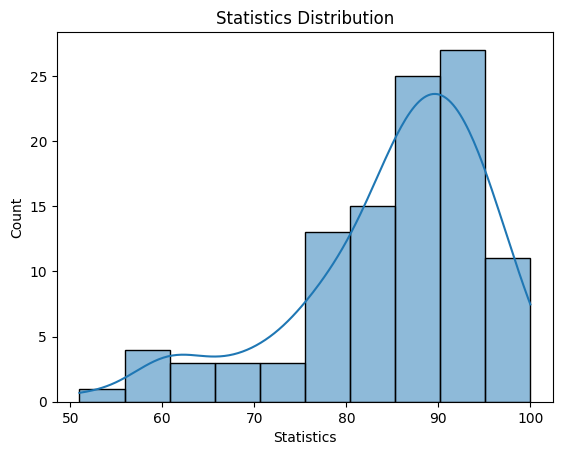

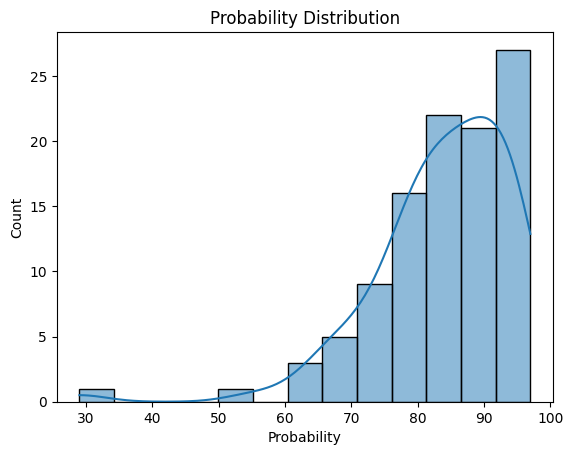

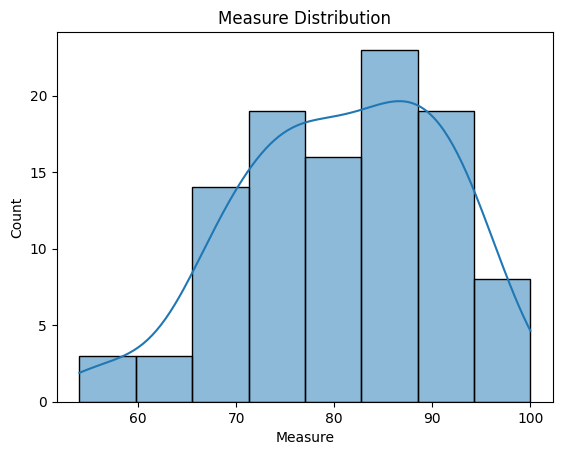

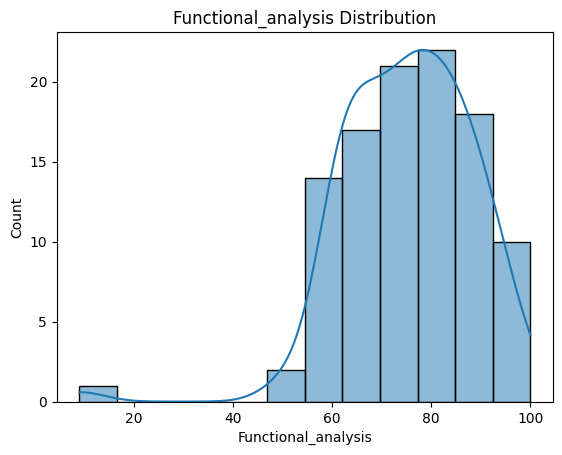

In [ ]:
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

 Feature Engineering

In [ ]:
# math class columns
math_cols = ['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']

# avarage column
df['math_avg'] = df[math_cols].mean(axis=1)

In [ ]:
# is there any lesson graded under 40?
df['has_low_math'] = (df[math_cols] < 40).any(axis=1).astype(int)

In [ ]:
print(df[['math_avg', 'has_low_math']].head())

    math_avg  has_low_math
0  71.000000             0
1  55.285714             0
2  59.857143             0
3  50.000000             1
4  58.571429             0


Categorical Encoding

In [ ]:
# one-hot encoding for columns with few categories
few_cat = ['gender', 'class']
df = pd.get_dummies(df, columns=few_cat, drop_first=True)

# label encoding for columns with multi categories
label_enc_cols = ['race', 'from1', 'from2', 'from3']
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Modeling

In [ ]:
# X and y distinction
X = df.drop("y", axis=1)
y = df["y"]


# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scaling (for logistic regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=2000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

for name, model in models.items():
    print(f"--- {name} ---")

    # decide whether to use scaled
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
    print("*" * 60)

--- Logistic Regression ---

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.50      0.20      0.29         5
           2       0.40      0.40      0.40         5

    accuracy                           0.52        21
   macro avg       0.49      0.44      0.44        21
weighted avg       0.51      0.52      0.50        21

Confusion Matrix:
 [[8 0 3]
 [4 1 0]
 [2 1 2]]


************************************************************
--- Random Forest ---

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.50      0.20      0.29         5
           2       0.50      0.20      0.29         5

    accuracy                           0.52        21
   macro avg       0.51      0.41      0.40        21
weighted avg       0.52      0.52      0.47        21

Confusion Matrix:
 [[9 1 1]


In [ ]:
print(y.value_counts())

y
0    55
1    25
2    25
Name: count, dtype: int64


In [ ]:
# models after adding (class_weight='balanced')
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', random_state=42)}

In [ ]:
# training and evaluation
for name, model in models.items():
    print(f"--- {name} ---")

    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
    print("*" * 60)

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.67      0.40      0.50         5
           2       0.43      0.60      0.50         5

    accuracy                           0.57        21
   macro avg       0.58      0.55      0.55        21
weighted avg       0.59      0.57      0.57        21

Confusion Matrix:
 [[7 0 4]
 [3 2 0]
 [1 1 3]]


************************************************************
--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.50      0.20      0.29         5
           2       0.67      0.40      0.50         5

    accuracy                           0.57        21
   macro avg       0.58      0.47      0.48        21
weighted avg       0.57      0.57      0.54        21

Confusion Matrix:
 [[9 1 1]
 [